# Gruppuppgift Del 2


**Name:**

**Name of the person who graded you during "kamratbedömning":**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import scipy.special 
import scipy.stats

# Chapter 6 in the Book

## Create two empty vectors, x1 and x2. Now do a for loop 100 times, where you for each iteration: 
## 1) Take the mean of 100 samples from $N(10, 5)$ and store it in x1. 
## 2) Take the mean of 100 samples from $N(10, 20)$ and store it in x2.

## So, your vectors x1 and x2 should contain 100 values. 

## From p.148 in the book, we know that the mean is an unbiased estimate of the fixed, but unknown $\mu$. The nice thing is that in our Monte Carlo Simulation we know the true $\mu$. Plot histograms of x1 and x2 and comment on the result, do we on "average" get the right mean? Is it easier or harder to estimate the mean when the variance is low/high? How is this knowledge useful in reality?

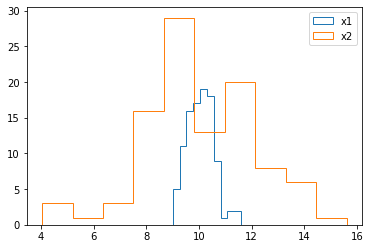

In [2]:
# Creating two empty list vector
x1 = []
x2 = []

# Looping through each iteration
for i in range(100):
    rand = np.random.normal(10, 5, 100) # storing and using np.rand.normal function to generate 100 samples from the normal distribution of the given standard deviation and sigma
    x = rand.mean() # getting the means of the distrubtions by using np.mean funtion 
    x1.append(x) # appanding the results to the x1 list

x1 = np.array(x1) # converting the x1 into an np array
    
## once we write for X1, the procedure for x2 is completely similar    
    
# Looping through each iteration
for i in range(100):
    rand = np.random.normal(10, 20, 100)
    x = rand.mean()
    x2.append(x)

x2 = np.array(x2)


fig, ax = plt.subplots() # initializing the matplotlib figure and axis.
ax.hist(x1, label = 'x1', histtype = 'step') # making histogram of x1 variable, also add a label 
ax.hist(x2, label = 'x2', histtype = 'step') # 'step' makes the graph transperrant so if the two distribution overlapps, we will still see both of them.
ax.legend() # displaying the variables on the graph
plt.show()

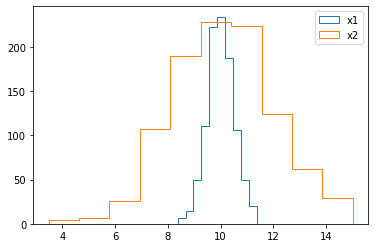

In [3]:
x1 = []
x2 = []

for i in range(1000):
    rand = np.random.normal(10,5,100)
    x = rand.mean()
    x1.append(x)
    
x1 = np.array(x1)

for i in range(1000):
    rand = np.random.normal(10,20,100)
    x = rand.mean()
    x2.append(x)
    
x2 = np.array(x2)


fig, ax = plt.subplots()
ax.hist(x1, label = 'x1', histtype = 'step')
ax.hist(x2, label = 'x2', histtype = 'step')
ax.legend()
plt.show()

1 a-) do we on "average" get the right mean? 

Answer: Yes, by analyzing the histogram of mean of x1 and x2 for 100 iterations, its pretty clear that the peak of histogram for both variables is at 10, which was true mean of the normal distribution from which we sampled our random variable. However, the histogram for x2 is more spread out then x1. This is because x2 was sampled from normal distribution with higher standard deviation of 20 then x1 which had standard deviation of only 5

1 b-) Is it easier or harder to estimate the mean when the variance is low/high? 

Answer: Yes, estimating the mean of sampling distribution that have higher variance is sligtly difficult, as we can see x2 have major density populated between 9 and 10, whereas for x1 the peak is very clearly visible at 10 only. Hence, to estimate the mean of distribution with larger variance the sample size and number of samples needs to be increased.

1 c-) How is this knowledge useful in reality?

Answer: This knowledge is useful in reality to estimate lot of population parameters. For example in a production line of chips factory, production engineer or quality checker cannot wait each and every packet to determing the mean weight of all the packets. Rather, it would be handy to pick up few hundred samples of appropriate size to determine the true mean of packets.

## Redo the same analysis as above but with 10000 generated samples and see if there is any difference (copy the code from above). Comment on the results. 

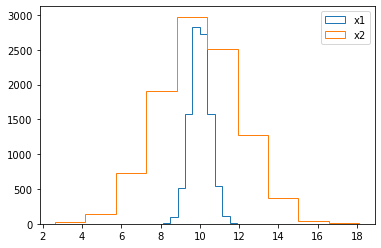

In [4]:
x1 = []
x2 = []

for i in range(10000):
    rand = np.random.normal(10,5,100)
    x = rand.mean()
    x1.append(x)
    
x1 = np.array(x1)

for i in range(10000):
    rand = np.random.normal(10,20,100)
    x = rand.mean()
    x2.append(x)
    
x2 = np.array(x2)


fig, ax = plt.subplots()
ax.hist(x1, label = 'x1', histtype = 'step')
ax.hist(x2, label = 'x2', histtype = 'step')
ax.legend()
plt.show()

2 -) Comment on the results.

Comments: No, there is not much difference that is observed. The sampling distribution for x2 is still more spread out than x1. x1 has major density at around 10, whereas x2 has it between 8 and 10.

# Chapter 7 - Confidence Intervals

Assuming $X$ is $N(10, 3)$, we know (see example calculation below) that a random sample x will with probability 95% be between: <br>
ci_lower = 10 - 1.96 x 3 <br> and <br>
ci_upper = 10 + 1.96 x 3

Example, for the ci_upper, we do the following calculation: $P(X > ci\_upper) = P(X > 10 + 1.96 * 3) = P(Z > 1.96) = 0.025$ where we used the usual standardization. 

This means that if you get observations from the normal distribution above, you would "expect" 95 \% of them to be between ci_lower and ci_upper. 

Your task is now to simulate 10, 100, 1000 and 10000 normally distributed samples from $N(10, 3)$ and check the relative frequency (\%) of how many samples fall outside the confidence interval. How many \% should it theoretically be?

In [5]:
ci_lower = 10 - 1.96*3
ci_upper = 10 + 1.96*3

print(ci_lower)
print(ci_upper)

4.12
15.879999999999999


In [6]:
"""part 1"""
list_10 = np.random.normal(10, 3, size=10)
list_100 = np.random.normal(10, 3, size=100)
list_1000 = np.random.normal(10, 3, size=1000)
list_10000 = np.random.normal(10, 3, size=10000)

print(list_10)

[ 8.71086755 12.89331691 10.73784958  6.88925577  9.28910124 10.17118131
  8.35198068  9.7198459  14.51342959 15.81044675]


In [7]:
"""testing"""

test_list = np.array([1, 12, 12, 12, 12, 12, 16, 1, 15, 15])

#skapar true/false = binomial
rel_test_list = np.array((ci_lower < test_list) & (test_list < ci_upper))

#samma som ovan + summering av de värden som ligger i utfallet
rel_test = np.array(((ci_lower > test_list) + (test_list > ci_upper)).sum())

print('som binomial: ', rel_test_list)
print()
print('antal false = dvs utanför 95% =', rel_test)
print()
print(type(rel_test)) # var tvungen att vara en array för att ovan skulle fungera.
print(len(test_list)) # för att kolla så att 

print()
print('test', (rel_test/len(test_list))*100, '%')

som binomial:  [False  True  True  True  True  True False False  True  True]

antal false = dvs utanför 95% = 3

<class 'numpy.ndarray'>
10

test 30.0 %


In [8]:
"""part 2 = rel freq in % """
rel_10 = ((ci_lower > list_10) + (list_10 > ci_upper)).sum()
rel_100 = ((ci_lower > list_100) + (list_100 > ci_upper)).sum()
rel_1000 = ((ci_lower > list_1000) + (list_1000 > ci_upper)).sum()
rel_10000 = ((ci_lower > list_10000) + (list_10000 > ci_upper)).sum()

print((rel_10/len(list_10))*100, '%')
print((rel_100/len(list_100))*100, '%')
print((rel_1000/len(list_1000))*100, '%')
print((rel_10000/len(list_10000))*100, '%')


0.0 %
6.0 %
4.5 %
4.63 %


### Theoretical should be 5 %

google sökningar med resultat som hjälpt till resultatet

https://stackoverflow.com/questions/9560207/how-to-count-values-in-a-certain-range-in-a-numpy-array

https://www.askpython.com/python/array/array-length-in-python

https://www.datacamp.com/tutorial/python-arrays

## Assume you have 100 observations from N(10, 3), you calculate a confidence interval and check if it "captures" the real $\mu$ (we know the reality since we are doing a monte carlo simulation), how often do you "capture" the real mu (in \%) when you repeat this 1000 times? How is this knowledge useful in reality?

## Note, the difference between this question and the one above is that here we calculate the sample mean and sample standard deviation to construct confidence intervals whereas above we used that we "knew the reality" ($\mu$ and $\sigma$), i.e. ci_lower <- 10 - 1.96*3 and  ci_upper <- 10 + 1.96*3. Obviosuly, this is not the case in reality.


Part I = one Monte Carlo sim

In [9]:
monte_carlo = np.random.normal(10, 3, size=100)

m = monte_carlo.mean() 
s = monte_carlo.std() 
dof = len(monte_carlo)-1 
confidence = 0.95

# np.abs - för att få endast positiva värden
#t kommer från scipy.stats
t_crit = np.abs(scipy.stats.t.ppf((1-confidence)/2, dof))

lower_ci = m-s*t_crit/np.sqrt(len(monte_carlo))
upper_ci = m+s*t_crit/np.sqrt(len(monte_carlo))

print('With', confidence*100, '% confidence the real mu is between', lower_ci, 'and', upper_ci )


With 95.0 % confidence the real mu is between 9.500232601941425 and 10.598646450420977


Part II = the % of trails that is within 95% confidence out of "n" (1000) trails 

In [10]:
rel_freq_monte = []
dof = 100-1 
dof_2 = 1000-1
confidence = 0.95

trials = 1000


t_crit = np.abs(scipy.stats.t.ppf((1-confidence)/2, dof))
t_crit_2 = np.abs(scipy.stats.t.ppf((1-confidence)/2, dof_2))

for i in range(trials):
    monte = np.random.normal(10, 3, size=100)
    monte_mean = np.mean(monte)
    monte_std = np.std(monte)
    lower_ci = (monte_mean-monte_std*t_crit/np.sqrt(trials))
    upper_ci = (monte_mean+monte_std*t_crit/np.sqrt(trials))
    cap_monte = ((lower_ci > monte) + (monte > upper_ci)).sum()
    rel_freq_monte.append(cap_monte)
    print(cap_monte)

n_trails_mean = np.mean(rel_freq_monte)
n_trails_std = np.std(rel_freq_monte)
    
n_trials_low = (n_trails_mean-n_trails_std*t_crit_2/np.sqrt(len(rel_freq_monte))) 
n_trials_up = (n_trails_mean+n_trails_std*t_crit_2/np.sqrt(len(rel_freq_monte)))
n_trials_inside = ((n_trials_low > rel_freq_monte) + (rel_freq_monte > n_trials_up)).sum()  


#print(n_trials_up)

# print(monte)
# print()
# print(monte_mean)
# print()
# print(monte_std)
# print()
# print(rel_freq_monte)
# # print(cap_monte)

42
48
44
48
41
52
45


## Confidence Intervals for proportions. 
So far, we have looked at confidence intervals for $\mu$. Often, we are also interested in proportions, $\pi$, this is for instance the case in elections that get much attention at TV and "nyhetsmorgon". 

## Assume we ask 1000 people who they will vote for and 4.2% answer Centerpartiet (C). Create a 90% Confidence Interval to get the proportion that would vote for C if we surveyed the whole population ("Totalundersökning"). OBS: note we want a 90% confidence interval.

In [11]:
#How to calculate CI when we know:
#population and favourable_outcome || missing: standardDIV, x_bar
# N = number of samplesize
# x = favourable_outcome
# CL = Confidencelevel in fraction
# Z = from z-table; 95% = 1.9600, 90% = 1.6449
# return is a tuple (lower_ci, upper_ci)
# Calulator to check that the function works as expected || https://sample-size.net/confidence-interval-proportion/ 

import numpy as np
def calc_ci(N, x, CL, Z):
    SEM = np.sqrt((x*(N-x)/N**3))
    PPR = x/N
    return ((PPR-(Z*SEM)),(PPR+(Z*SEM)))

lower_ci, upper_ci = calc_ci(1000, 42, 0.90, 1.6449)
print(lower_ci)
print(upper_ci)

0.031566094467632935
0.05243390553236707


In [12]:
#Found a shorter function for this. 
# count = favourable_outcome
# nobs = number of samplesize
# alpha = deviation from standard [standard beeing 95%, if you want anything else, type the difference in fraction]
# return is a tuple (lower_ci, upper_ci)
from statsmodels.stats.proportion import proportion_confint
lower_ci, upper_ci = proportion_confint(count=42, nobs=1000, alpha=0.10)
print(lower_ci)
print(upper_ci)

0.03156638862047359
0.052433611379526415


## For this question see (p. 177 - 178) in the book. We ask 1000 people who they will vote for, 4.2% answer Centerpartiet (C) and 4.5% answer Liberalerna (L), is there a statistical significant difference between the two parties? 

## Check if the assumption on  np(1-p) > 5 is satisfied for both poportions.

In [13]:
#Calculate Significant difference
# p1 = number of favourable_outcome sample1
# n1 = number of samplesize sample1
# p2 = number of favourable_outcome sample2
# n2 = number of samplesize sample2
# return is a boolean 
# Z = from z-table, 95% CL = 1.96, 90% = 1.6449
# source | https://help.surveymonkey.com/en/analyze/significant-differences/

import numpy as np
def calc_significant_diff(p1, n1, p2, n2, Z):
    a1 = p1/n1*n1
    b1 = p2/n2*n2
    p = (p1+p2) / (n1+n2)
    SE = np.sqrt((p*(1-p)) * ((1/n1) +(1/n2)))
    t = (p1/n1-p2/n2) / SE
    if(t > Z):
        return True
    else:
        return False

calc_significant_diff(42, 1000, 45, 1000, 1.6449)

False

# Chapter 8 - Hypothesis Testing
In the code below, can we reject the hypothesis that $\mu = 5$ ? Can we reject the hypothesis that $\mu = 0$ ? How do you interpret the p-value?

Read the following documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html to understand the function. 

In [14]:
x = scipy.stats.norm.rvs(loc = 0, scale = 4, size = 100)

In [15]:
print(scipy.stats.ttest_1samp(x, 5))

Ttest_1sampResult(statistic=-12.956347481844327, pvalue=4.82548081084914e-23)


Answer: Reject, the p value is far far below 0.05.
(as the 1.7369.... is to the power of e-22. i.e 0.000000......17369)


In [16]:
print(scipy.stats.ttest_1samp(x, 0))

Ttest_1sampResult(statistic=-0.7733300072802091, pvalue=0.44116970441693315)


Answer: Accept, the p value is greater than 0.05
